Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. 

In [100]:
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl

In [101]:
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
import SolveTriangular

dati = loadmat('Test_II.mat')
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)
A2=dati["A2"]
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)
A3=dati["A3"]
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)

Risolvere i 3 sistemi lineari aventi matrice dei coefficienti A1 e termine noto b1, matrice dei coefficienti A2 e termine noto b2, matrice dei coefficienti A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

                                                                                            punti 12

In [102]:
""" 
Sistemi lineari risolvibili con metodi diretti o iterativi.
Se matrice piccola e densa => diretti
Se grande e sparsa => iterativi
"""
print(f'Dimensioni matrice A1 = {A1.shape}') # matrice piccola
m,n = A1.shape
print(f'% di elementi diversi da 0 = {np.count_nonzero(A1)*100 / (m * n)}') # matrice densa
# Verifico se è simmetrica e definita positiva per applicare LU (Gauss)
if np.all(A1.T == A1):
    print("A1 è simmetrica")
    if np.all(np.linalg.eigvals(A1) > 0): 
        print("A1 è definita positiva")
    else: print("A1 non è definita positiva")
else: print("A1 non è simmetrica")

Dimensioni matrice A1 = (10, 10)
% di elementi diversi da 0 = 100.0
A1 è simmetrica
A1 non è definita positiva


In [103]:
# A quadrata e simmetrica => fattorizzazione LU
P, L, U = spl.lu(A1)
P = P.T
y, flag = SolveTriangular.Lsolve(L, P @ b1)
x,flag=SolveTriangular.Usolve(U,y) 
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [104]:
print(f'Dimensioni matrice A2 = {A2.shape}')
m,n = A2.shape
print(f'% di elementi diversi da 0 = {np.count_nonzero(A2)*100 / (m * n)}')
# Verifico se è simmetrica e definita positiva per applicare LU (Gauss)
if np.all(A2 == A2.T):
    print("A2 è simmetrica")
    if np.all(np.linalg.eigvals(A2) > 0): 
        print("A2 è definita positiva")
    else: print("A2 non è definita positiva")
else: print("A2 non è simmetrica")

Dimensioni matrice A2 = (25, 10)
% di elementi diversi da 0 = 100.0
A2 non è simmetrica


C:\Users\lisav\AppData\Local\Temp\ipykernel_22860\399812462.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(A2 == A2.T):


In [105]:
# il sistema è sovradeterminato
# la matrice è rettangolare quindi uso QRLS
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R = spl.qr(A)
    h = Q.T @ b
    x,flag=SolveTriangular.Usolve(R[0:n, 0:n], h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

In [106]:
x2, residuo2 = qrLS(A2, b2)
print(f'soluzione sistema A2 x = b2 è {x2}')

soluzione sistema A2 x = b2 è [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [107]:
print(f'Dimensioni matrice A3 = {A3.shape}')
m,n = A3.shape
print(f'% di elementi diversi da 0 = {np.count_nonzero(A3)*100 / (m * n)}') 
# Verifico se è simmetrica e definita positiva per applicare LU (Gauss)
if np.all(A3.T == A3):
    print("A3 è simmetrica")
    if np.all(np.linalg.eigvals(A3) > 0): 
        print("A3 è definita positiva")
    else: print("A3 non è definita positiva")
else: print("A3 non è simmetrica")

Dimensioni matrice A3 = (225, 225)
% di elementi diversi da 0 = 2.1037037037037036
A3 è simmetrica
A3 è definita positiva


In [108]:
# simmetrica e definita positiva => Cholesky. Si basa sul teorema secondo cui "sia A una matice di ordine n simmetrica e definita positiva,
# allora esiste una matrice triangolare inferiore L con elementi diagonali positivi tale che A = L @ L.T" 

def Cholesky(A, b): 
    L = npl.cholesky(A)
    y, flag = SolveTriangular.Lsolve(L, b)
    if flag == 0: 
        x, flag = SolveTriangular.Usolve(L.T, y)
    else: 
        print("metodo non applicabile")
        return None, None
    return x, flag

In [109]:
x3, flag = Cholesky(A3, b3)
print(f'soluzione x3 di A3x=b3 = {x3}')

soluzione x3 di A3x=b3 = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1

Verificare se le matrici sono malcondizionate. Indicare la formula matematica dell'indice di condizionamento e spiegare perchè è importante conoscere l'indice di condizionamento di una matrice.
                                                                                           
                                                                                           punti 2

In [110]:
# Studio il condizionamento delle tre matrici, valutando l'indice di condizionamento K
K1 = npl.cond(A1) 
if K1 > 10^4: 
    print(f'matrice A1 mal condizionata con K = {K1}')
elif K1 < 100:
    print(f'matrice A1 ben condizionata con K = {K1}')
elif 100 < K1 < 10^4: 
    print(f'matrice A1 mediamente mal condizionata con K = {K1}')

matrice A1 mal condizionata con K = 120.6148722322323


In [111]:
K2 = npl.cond(A2) 
if K2 > 10^4: 
    print(f'matrice A2 mal condizionata con K = {K2}')
elif K2 < 100:
    print(f'matrice A2 ben condizionata con K = {K2}')
elif 100 < K2 < 10^4: 
    print(f'matrice A2 mediamente mal condizionata con K = {K2}')

matrice A2 mal condizionata con K = 10000.00000000046


In [112]:
K3 = npl.cond(A3) 
if K3 > 10^4: 
    print(f'matrice A3 mal condizionata con K = {K3}')
elif K3 < 100:
    print(f'matrice A2 ben condizionata con K = {K3}')
elif 100 < K3 < 10^4: 
    print(f'matrice A2 mediamente mal condizionata con K = {K3}')

matrice A3 mal condizionata con K = 103.08686891981725


L'indice di condizionamento viene così valutato: errore sulla soluzione <= K * errore sui dati. Il condizionamento, infatti, indica quanto varia la soluzione di un problema in seguito a perturbazioni sui dati

Dopo aver copiato nel numpy array b1p il termine noto b1 del primo sistema lineare con matrice dei coefficienti A1, effettuarne una perturbazione della prima componente nel seguente modo b1p[0]=b1p[0]+0.001*b1p[0]. Risolvere il sistema lineare con matrice A1 e termine noto perturbato b1p. Calcolare l'errore relativo sulla soluzione e l'errore relativo sul termine noto, descrivere ciò che si verifica giustificandolo alla luce della teoria.

                                                                                           punti 2

In [116]:
b1p = np.copy(b1)
b1p[0]=b1p[0]+0.001*b1p[0]


## Esercizio 2 ##

Per ogni $k \in N$ l'equazione di II grado $x^2+(2^{2k}-3^{-2k})x-2^{2k}3^{-2k}=0 $ ha come soluzioni esatte $x_1=-2^{2k}$,$x_2=3^{-2k}$.
Scrivere lo script python in cui

1. Si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 6 e 16;  [**Punti 2**]

In [ ]:
import numpy as np

In [ ]:
k = np.linspace(6, 16, 11) # k assume valori interi da 6 e 16 => 11 valori

x1_true = -4**k
x2_true = (1/9)**k

a = 1
b = 4**k - (1/9)**k
c = -4**k * (1/9)**k
x1 = (- b - np.sqrt(b**2 - 4 * a * c))/2 
x2 =  (- b + np.sqrt(b**2 - 4 * a * c))/2
print(f'soluzioni esatte del polinomio = {x1_true}, {x2_true}')
print(f'\nsoluzioni calcolate: x1 = {x1}, x2 = {x2}')

soluzioni esatte del polinomio = [-4.09600000e+03 -1.63840000e+04 -6.55360000e+04 -2.62144000e+05
 -1.04857600e+06 -4.19430400e+06 -1.67772160e+07 -6.71088640e+07
 -2.68435456e+08 -1.07374182e+09 -4.29496730e+09], [1.88167642e-06 2.09075158e-07 2.32305731e-08 2.58117479e-09
 2.86797199e-10 3.18663555e-11 3.54070616e-12 3.93411796e-13
 4.37124217e-14 4.85693575e-15 5.39659528e-16]

soluzioni calcolate: x1 = [-4.09600000e+03 -1.63840000e+04 -6.55360000e+04 -2.62144000e+05
 -1.04857600e+06 -4.19430400e+06 -1.67772160e+07 -6.71088640e+07
 -2.68435456e+08 -1.07374182e+09 -4.29496730e+09], x2 = [1.88167633e-06 2.09074642e-07 2.32284947e-08 2.57568900e-09
 2.32830644e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


2. Per entrambe le soluzioni, si calcoli l'errore relativo commesso al variare di k che assume valori interi tra 6 e 16;   [**Punti 1**]

In [ ]:
err_x1 = np.abs(x1-x1_true) / np.abs(x1_true)
err_x2 = np.abs(x2 - x2_true) / np.abs(x2_true)

print(f'\nerr_x1 = {err_x1}, \n\nerr_x2 = {err_x2}')


err_x1 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], 

err_x2 = [5.17056830e-08 2.46841955e-06 8.94701188e-05 2.12530988e-03
 1.88169744e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]


3. Si rappresentino in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]

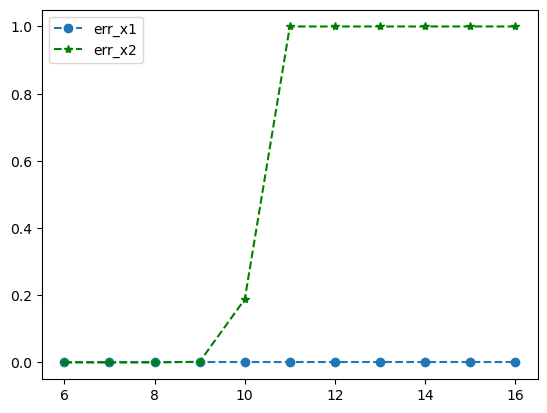

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k, err_x1, 'o--', k, err_x2, 'g*--') # disegno nell'intervallo richiesto
plt.legend(['err_x1','err_x2'])
plt.show()

4. osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria. [**Punti 6**]

Dal grafico si nota che l'errore relativo alla soluzione x1 è nullo. 
Invece, nel caso della soluzione x2, nell'intervallo 9-16, l'errore si amplifica in maniera elevata: questo è dovuto al fatto che, nella formula risolutiva del polinomiodi secondo grado dato, per x2 si sono sommati due valori molto vicini in modulo, ma di segno opposto. Infatti, ricordiamo che l'operazione di somma può essere pericolosa nell'insieme dei numeri di macchina. 

5. In caso di instabilita', si fornisca un algoritmo di calcolo stabile e si mostrino in un nuovo grafico gli
andamenti dei nuovi errori relativi ottenuti. [**Punti 6**]

Un algoritmo più efficiente per il calcolo delle radici di un’equazione di II° grado è il seguente:
calcolo la radice che, in base al segno di b, non porta problemi, cioè evita la differenza tra numeri
molto vicini in modulo, tenendo conto
della relazione che lega le due radici di un’equazione di secondo grado: x1 * x2 = c => x2 = c / x1

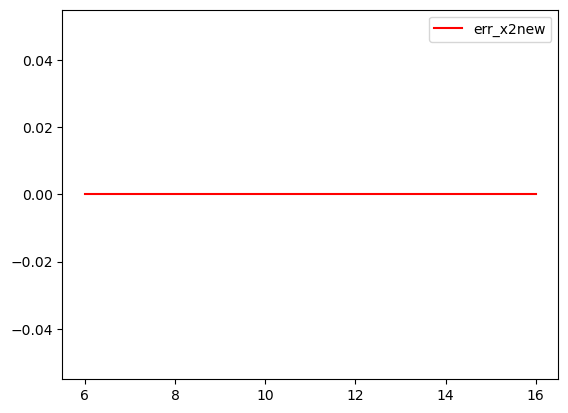

In [115]:
x2_new = c / x1

err_x2new = np.abs(x2_new - x2_true) / np.abs(x2_true)
plt.plot(k, err_x2new, 'r-')
plt.legend(['err_x2new'])